In [21]:
import numpy as np

# Preprocessing

In [22]:
data_read = []
with open('yearpredictionmsd/YearPredictionMSD.txt', 'r') as file:
    lines = file.readlines()
data_read = [line.strip().split(",") for line in lines]

In [23]:
# Validate that feature matches the specs
print("Total number of instance ", len(data_read))
print("Total number of features ", len(data_read[0][1:]))

Total number of instance  515345
Total number of features  90


### Checking for any missing attributes -> each instance should have 91 columns, index 0 matches year, index 1-90 matches features.

In [24]:
anomalies = []
for index, instance in enumerate(data_read):
    if (len(instance) != 91):
        anomalies.append(index)
print("No Anomalies detected: ", len(anomalies) == 0)

No Anomalies detected:  True


### Breakdown data into training and testing, first 463,715 to be training via data set instructions. Separate year with features, converting types.

In [25]:
training = np.array(data_read[:463715])
testing = np.array(data_read[463715:])

In [26]:
print(f"length of training {len(training)}, length of testing {len(testing)}, total {len(data_read)}")

length of training 463715, length of testing 51630, total 515345


In [27]:
def data_cleaning(data):
    years = data[:, 0]
    years = [int(year) for year in years]
    features = data[:, 1:]
    features = [np.double(feature) for feature in features]
    return np.array(years), np.array(features)


In [28]:
training_year, training_features = data_cleaning(training)
testing_year, testing_features = data_cleaning(testing)

### For Training Data, first normalize the attributes. 12 average timbre features / 78 timbre covariance features. Normalize each set first, then combine.

In [29]:
from sklearn.preprocessing import StandardScaler
training_avg = training_features[:,:12]
training_cov = training_features[:,12:]


training_scale_avg = StandardScaler()
training_scale_cov = StandardScaler()

training_avg_norm = training_scale_avg.fit_transform(training_avg)
training_cov_norm = training_scale_cov.fit_transform(training_cov)
training_features_norm = np.hstack((training_avg_norm, training_cov_norm))
print("Normalized feature shape: ", training_features_norm.shape)

Normalized feature shape:  (463715, 90)


# Data Analysis

In [13]:
import pandas as pd

training_features_columns = [f"timbre_feature_{i}" for i in range(training_features_norm.shape[1])]
training_df = pd.DataFrame(training_features_norm, columns=training_features_columns)
training_df['year'] = training_year
training_df.head()

,timbre_feature_0,timbre_feature_1,timbre_feature_2,timbre_feature_3,timbre_feature_4,timbre_feature_5,timbre_feature_6,timbre_feature_7,timbre_feature_8,timbre_feature_9,...,timbre_feature_81,timbre_feature_82,timbre_feature_83,timbre_feature_84,timbre_feature_85,timbre_feature_86,timbre_feature_87,timbre_feature_88,timbre_feature_89,year
0,1.078786,0.391566,1.826962,0.466361,-0.476621,-0.275266,-1.551924,-1.311105,0.389093,-0.665402,...,0.106413,0.144257,-0.236180,0.047430,-0.355855,0.544084,-0.470477,-0.255366,0.042637,2001
1,0.879511,0.332631,1.748961,0.723345,-0.166769,-1.189729,0.764797,0.109714,1.422683,0.416934,...,0.304413,-0.068758,0.053729,-0.634467,-0.435794,0.556059,0.570861,0.209341,1.161118,2001
2,1.245515,0.592771,1.337550,0.752153,-0.002899,-0.699856,-0.061323,-0.069912,1.167910,-0.073176,...,0.565220,-0.758259,-0.282931,-0.026058,0.223918,-0.508889,-0.338081,0.107828,-0.090122,2001
3,0.799787,-0.061214,0.784000,0.089197,0.327463,-1.297159,0.509977,-1.073557,-0.015553,-1.262565,...,-0.562444,-0.479423,-0.890199,-0.796124,0.568335,-0.262505,0.409924,0.973205,0.795200,2001
4,1.247663,0.793377,1.657449,0.449177,-0.408652,-0.564673,-0.692545,-0.952369,0.843389,-0.143557,...,0.097564,0.192974,-0.585048,-0.113758,-0.219524,0.448546,0.258400,0.194381,1.244057,2001


### Plot a heatmap of feature correlation matrix to see which features are correlated with another. Also plot to see if there is a strong single feature correlated with the year.

In [ ]:
pip install seaborn

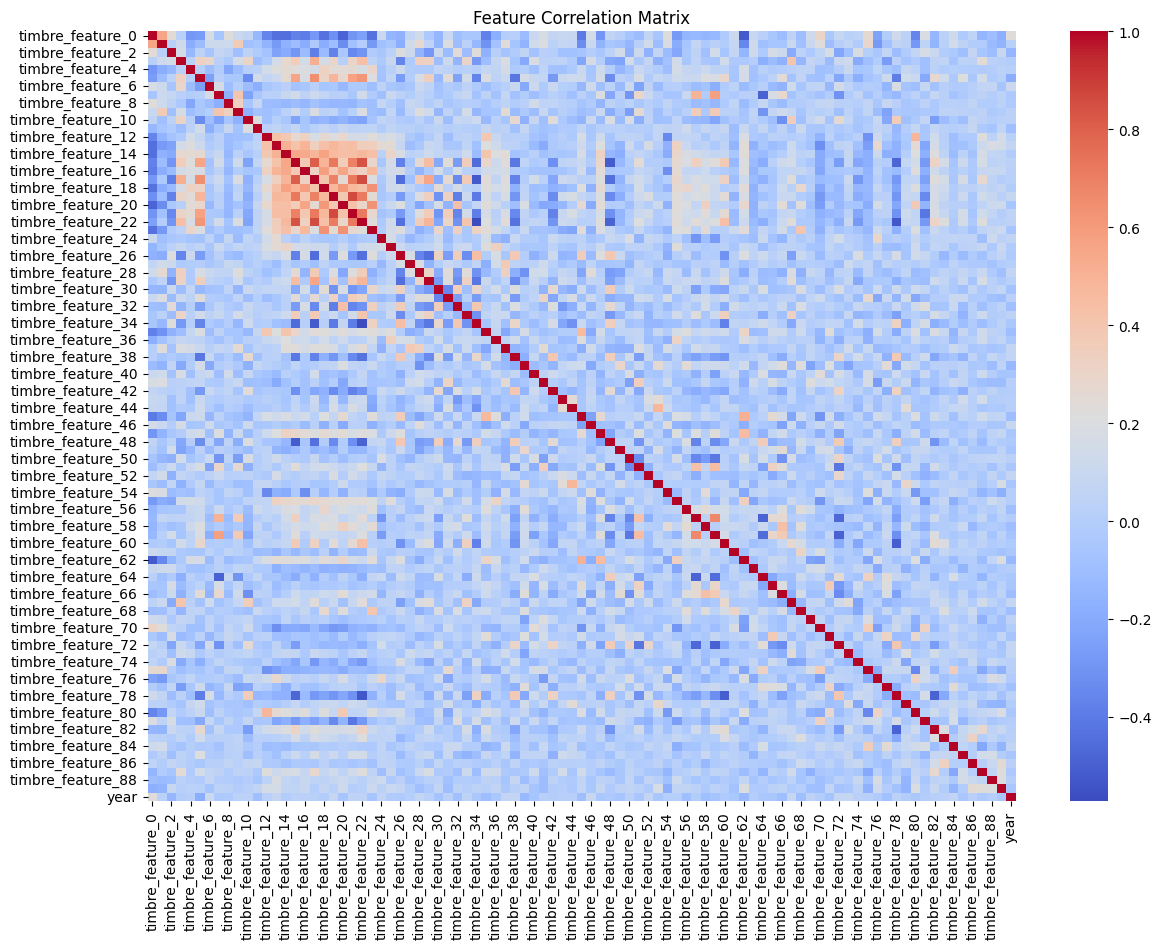

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix (features + year)
corr_matrix = training_df.corr()

# Heatmap of correlation
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

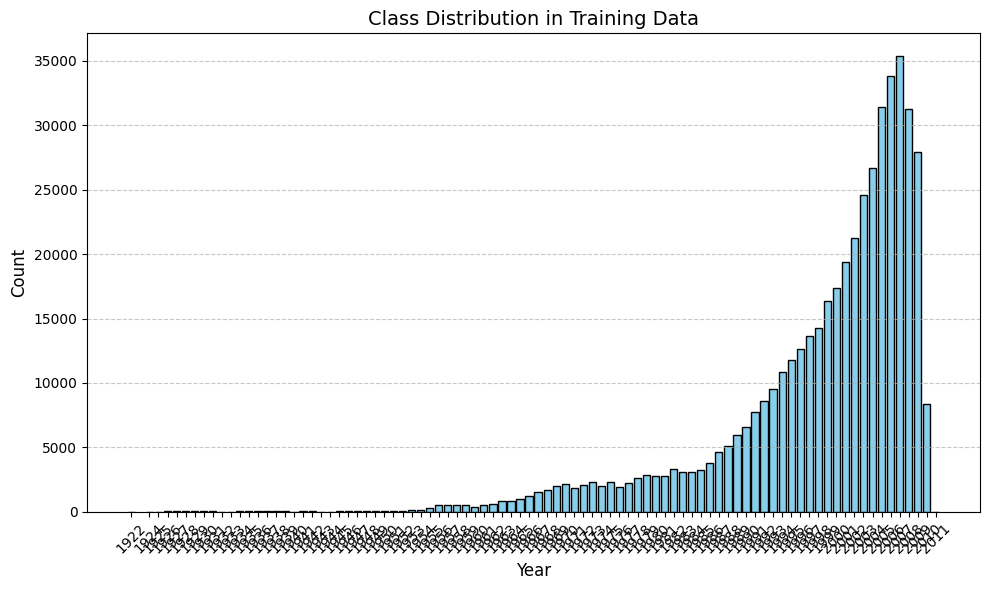

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate unique values and their counts
unique, counts = np.unique(training_year, return_counts=True)

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='skyblue', edgecolor='black')
plt.title('Class Distribution in Training Data', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(unique, rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
pip install imbalanced-learn

In [31]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Apply SMOTE
smote = SMOTE(random_state=42)
training_features_resampled, training_year_resampled = smote.fit_resample(training_features_filtered, training_year_filtered)

# Map year labels to indices
unique_classes = np.unique(training_year_resampled)
label_to_index = {label: idx for idx, label in enumerate(unique_classes)}

# Map training labels to indices
training_year_mapped = np.array([label_to_index[label] for label in training_year_resampled])

# One-hot encode the mapped labels
num_classes = len(unique_classes)
training_labels_one_hot_resampled = np.eye(num_classes)[training_year_mapped]

print("One-hot encoding completed!")

One-hot encoding completed!


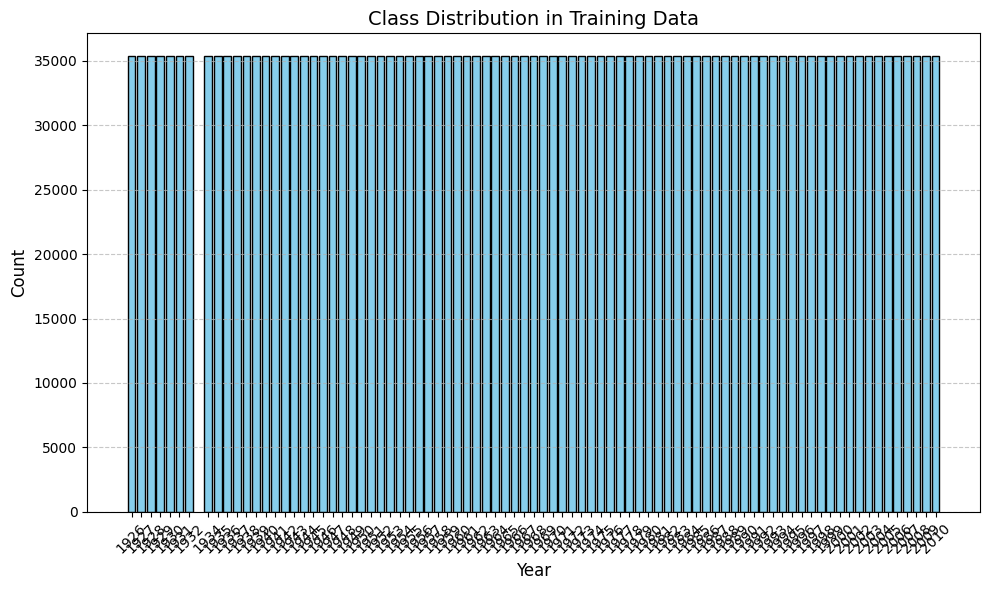

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate unique values and their counts
unique, counts = np.unique(training_year_resampled, return_counts=True)

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='skyblue', edgecolor='black')
plt.title('Class Distribution in Training Data', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(unique, rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Mini-Batch Linear Regression with Early Stopping

This notebook implements **Mini-Batch Linear Regression** for regression tasks, specifically designed to predict continuous target variables. Key features of this implementation include:

- **Mean Squared Error (MSE) Loss**: Optimizes the model by minimizing the difference between predicted and actual target values.
- **Mini-Batch Training**: Processes the data in smaller batches to balance memory efficiency and gradient updates.
- **Shuffling Per Epoch**: Randomly shuffles data at the start of each epoch to prevent bias from data ordering.
- **Early Stopping**: Stops training when the loss improvement falls below a specified threshold for a given number of epochs, preventing overfitting and saving computation time.

### Parameters:
- **`learning_rate`**: Step size for gradient descent updates.
- **`batch_size`**: Number of samples per mini-batch.
- **`max_epochs`**: Maximum number of training epochs.
- **`early_stopping_threshold`**: Minimum change in loss to consider as an improvement.
- **`patience`**: Number of epochs to wait for an improvement before stopping.

This implementation is designed to balance **efficiency**, **robustness**, and **generalization** for regression tasks. It is suitable for datasets with continuous target variables and large feature sets, ensuring scalable and interpretable results.

In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error

class MiniBatchLinearRegressionWithEarlyStopping:
    def __init__(self, learning_rate=0.01, batch_size=64, max_epochs=1000, early_stopping_threshold=1e-4, patience=5):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.max_epochs = max_epochs
        self.early_stopping_threshold = early_stopping_threshold
        self.patience = patience
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize weights and bias
        self.weights = np.random.randn(num_features) * 0.01
        self.bias = 0

        best_loss = float('inf')  # Track the best loss
        no_improvement_epochs = 0  # Count epochs with no significant improvement

        for epoch in range(self.max_epochs):
            # Shuffle data at the start of each epoch
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]

            epoch_loss = 0

            # Process data sequentially in mini-batches
            for start_idx in range(0, num_samples, self.batch_size):
                end_idx = min(start_idx + self.batch_size, num_samples)
                X_batch = X[start_idx:end_idx]
                y_batch = y[start_idx:end_idx]

                # Forward pass: Calculate predictions
                predictions = np.dot(X_batch, self.weights) + self.bias

                # Compute gradients
                error = predictions - y_batch
                gradient_weights = np.dot(X_batch.T, error) / len(X_batch)
                gradient_bias = np.mean(error)

                # Update weights and bias
                self.weights -= self.learning_rate * gradient_weights
                self.bias -= self.learning_rate * gradient_bias

                # Accumulate loss for the batch
                batch_loss = mean_squared_error(y_batch, predictions)
                epoch_loss += batch_loss

            # Average loss over the epoch
            epoch_loss /= (num_samples // self.batch_size)

            # Early stopping check based on loss
            if best_loss - epoch_loss < self.early_stopping_threshold:
                no_improvement_epochs += 1
            else:
                no_improvement_epochs = 0
                best_loss = epoch_loss  # Update the best loss

            # Stop if no improvement for `patience` epochs
            if no_improvement_epochs >= self.patience:
                print(f"Early stopping at epoch {epoch + 1} with best loss {best_loss:.4f}")
                break

            # Monitor training progress
            if (epoch + 1) % 10 == 0 or epoch == 0:
                print(f"Epoch {epoch + 1}/{self.max_epochs}, Loss: {epoch_loss:.4f}")

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [35]:
# Train the model with early stopping using linear regression
model = MiniBatchLinearRegressionWithEarlyStopping(
    learning_rate=0.05, 
    batch_size=128, 
    max_epochs=100, 
    early_stopping_threshold=1e-4, 
    patience=10
)

print("Training the linear regression model with SMOTE and early stopping...")
model.fit(training_features_resampled, training_year_resampled)

print("Model training completed.")

Training the linear regression model with SMOTE and early stopping...
Epoch 1/100, Loss: 1976.9015
Epoch 10/100, Loss: 179.8278
Epoch 20/100, Loss: 179.8371
Early stopping at epoch 26 with best loss 179.7105
Model training completed.


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split and normalize test features
testing_avg = testing_features[:, :12]
testing_cov = testing_features[:, 12:]

testing_avg_norm = training_scale_avg.transform(testing_avg)  # Normalize using training scaler
testing_cov_norm = training_scale_cov.transform(testing_cov)  # Normalize using training scaler

# Combine normalized features
testing_features_norm = np.hstack((testing_avg_norm, testing_cov_norm))

# Step 3: Predict on the test data
testing_predictions = model.predict(testing_features_norm)

# Step 4: Evaluate the model
mse = mean_squared_error(testing_year, testing_predictions)
mae = mean_absolute_error(testing_year, testing_predictions)
r2 = r2_score(testing_year, testing_predictions)

print(f"Evaluation Metrics on Test Data:")
print(f"- Mean Squared Error (MSE): {mse:.4f}")
print(f"- Mean Absolute Error (MAE): {mae:.4f}")
print(f"- R² Score: {r2:.4f}")

Evaluation Metrics on Test Data:
- Mean Squared Error (MSE): 348.9870
- Mean Absolute Error (MAE): 14.4561
- R² Score: -1.9634


In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=30,       # Reduced number of trees
    max_depth=15,          # Limit tree depth
    max_samples=0.8,       # Use 80% of the data for each tree
    max_features='sqrt',   # Use square root of features for splitting
    random_state=42,
    n_jobs=-1
)

print("Training the optimized Random Forest Regressor...")
rf_model.fit(training_features_resampled, training_year_resampled)

# Predict on the test data
testing_predictions = rf_model.predict(testing_features_norm)

# Evaluate the model
mse = mean_squared_error(testing_year, testing_predictions)
mae = mean_absolute_error(testing_year, testing_predictions)
r2 = r2_score(testing_year, testing_predictions)

# Display the results
print("Evaluation Metrics on Test Data:")
print(f"- Mean Squared Error (MSE): {mse:.4f}")
print(f"- Mean Absolute Error (MAE): {mae:.4f}")
print(f"- R² Score: {r2:.4f}")

Training the optimized Random Forest Regressor...
